In [64]:
import os

In [65]:
os.getcwd()

'c:\\Users\\arun7\\Desktop\\projects\\Rental_Bike_share_prediction_project\\notebook'

In [66]:
import pandas as pd

In [67]:
#pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip')

In [68]:
os.path.basename('https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip')

'Bike-Sharing-Dataset.zip'

In [69]:
from zipfile import ZipFile

In [70]:
file_path=r'C:\Users\arun7\Downloads\Bike-Sharing-Dataset (6).zip'

In [71]:
with ZipFile(file_path,'r') as zip_file:
    zip_file.extractall(path=path_1)

In [72]:
path_1=r'c:\\Users\\arun7\\Desktop\\projects\\Rental_Bike_share_prediction_project\\notebook\\new'

In [73]:
file_name=os.listdir(path_1)[1]
csv_=os.path.join(path_1,file_name)

In [74]:
import pandas as pd
df=pd.read_csv(csv_)

In [75]:
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [76]:
df['atemp'].value_counts()

0.6212    988
0.5152    618
0.4091    614
0.3333    600
0.6667    593
         ... 
0.0152      4
0.9848      2
0.0000      2
1.0000      1
0.9545      1
Name: atemp, Length: 65, dtype: int64

In [77]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Density'>

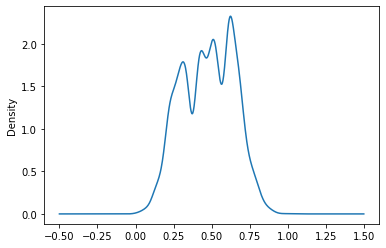

In [104]:
df['atemp'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

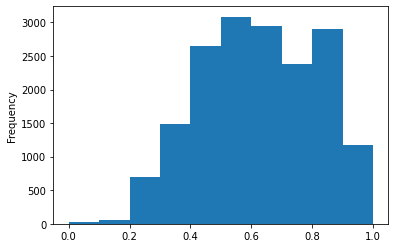

In [106]:
df['hum'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

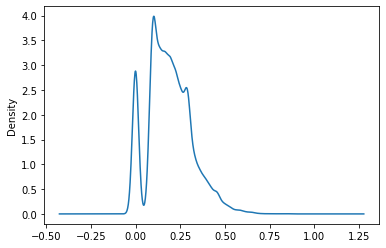

In [89]:
df['windspeed'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

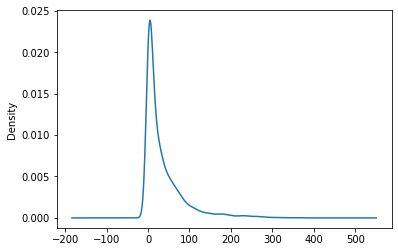

In [86]:
df['casual'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

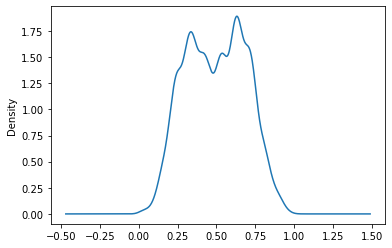

In [85]:
df['temp'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

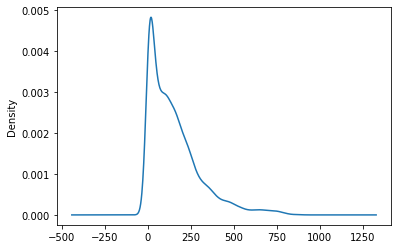

In [92]:
df['registered'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

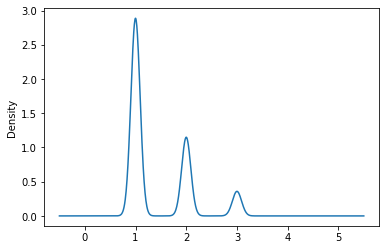

In [94]:
df['weathersit'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

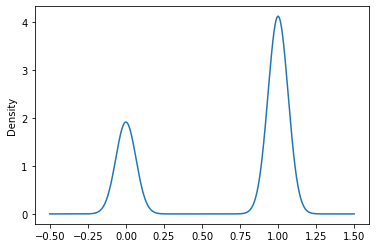

In [95]:
df['workingday'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

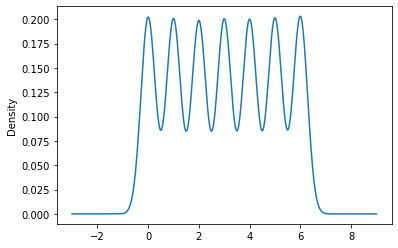

In [96]:
df['weekday'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

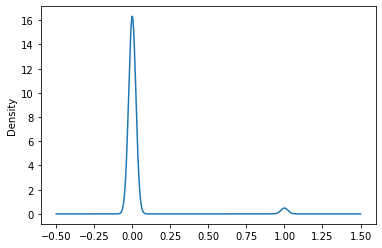

In [97]:
df['holiday'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

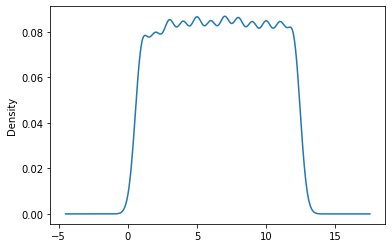

In [98]:
df['mnth'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

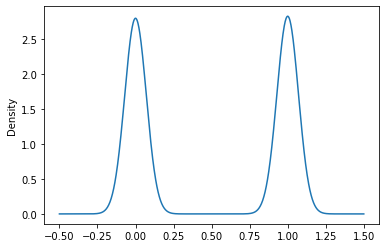

In [99]:
df['yr'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

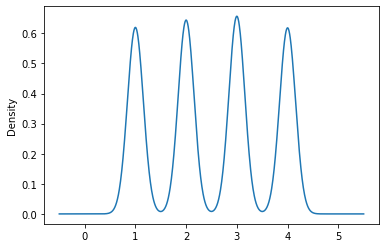

In [100]:
df['season'].plot(kind='kde')

In [117]:
df['hum_cat']=pd.cut(df['hum'],bins=[-(np.inf),0.2,0.4,0.6,0.8,1.0],labels=[1,2,3,4,5])

In [112]:
import numpy as np

([<matplotlib.patches.Wedge at 0x1f7e5154278>,
 [Text(0.5994947757394713, 0.9222830443313382, '3'),
  Text(-1.083955128287422, 0.18719316189273214, '4'),
  Text(-0.047012762172405055, -1.0989949045345575, '5'),
  Text(0.9830554288826481, -0.4935605573223545, '2'),
  Text(1.0998378018028965, -0.018889407756016812, '1')],
 [Text(0.326997150403348, 0.5030634787261844, '31.7%'),
  Text(-0.5912482517931392, 0.10210536103239934, '31.3%'),
  Text(-0.025643324821311844, -0.5994517661097586, '22.8%'),
  Text(0.536212052117808, -0.26921484944855695, '13.7%'),
  Text(0.5999115282561253, -0.010303313321463715, '0.5%')])

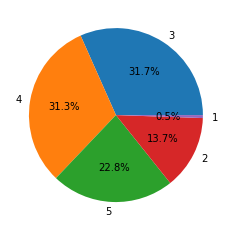

In [140]:
plt.pie(df['hum_cat'].value_counts(),labels=df.hum_cat.value_counts().index,autopct='%1.1f%%')

In [122]:
from sklearn.model_selection import StratifiedShuffleSplit

In [124]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=34)

In [126]:
for train_ix,test_ix in split.split(df,df['hum_cat']):
    print(train_ix)

[  763  9513  4670 ... 16598  7630 11547]


In [127]:
train_df=df.loc[train_ix]

In [129]:
test_df=df.loc[test_ix]

In [130]:
train_df.shape

(13903, 18)

In [131]:
test_df.shape

(3476, 18)

([<matplotlib.patches.Wedge at 0x1f7e50eb5c0>,
 [Text(0.5994399421947036, 0.9223186844586911, '3'),
  Text(-1.0839884636094657, 0.187000028774304, '4'),
  Text(-0.04683979454288607, -1.0990022901009717, '5'),
  Text(0.9830743513493809, -0.4935228664601004, '2'),
  Text(1.0998377940930146, -0.01888985665937206, '1')],
 [Text(0.326967241197111, 0.5030829187956496, '31.7%'),
  Text(-0.5912664346960721, 0.1020000156950749, '31.3%'),
  Text(-0.025548978841574217, -0.59945579460053, '22.8%'),
  Text(0.5362223734632986, -0.2691942907964184, '13.7%'),
  Text(0.5999115240507352, -0.010303558177839305, '0.5%')])

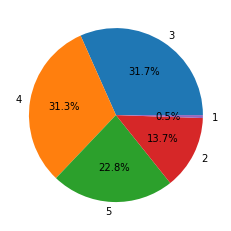

In [139]:
plt.pie(train_df['hum_cat'].value_counts(),labels=train_df['hum_cat'].value_counts().index,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1f7e5645ac8>,
 [Text(0.5997142614005435, 0.9221403389250472, '3'),
  Text(-1.0838213373146948, 0.18796624372845908, '4'),
  Text(-0.04770539269634234, -1.0989650565453335, '5'),
  Text(0.9829794009930627, -0.4937119577479564, '2'),
  Text(1.0998378202616534, -0.01888833296230786, '1')],
 [Text(0.32711686985484184, 0.502985639413662, '31.6%'),
  Text(-0.5911752748989244, 0.10252704203370494, '31.2%'),
  Text(-0.026021123288914, -0.5994354853883637, '22.8%'),
  Text(0.5361705823598523, -0.2692974314988853, '13.7%'),
  Text(0.5999115383245383, -0.01030272707034974, '0.5%')])

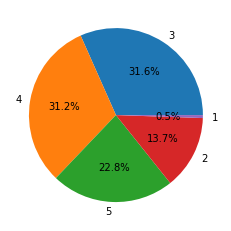

In [138]:
plt.pie(test_df['hum_cat'].value_counts(),labels=test_df['hum_cat'].value_counts().index,autopct='%1.1f%%')

In [1]:
os.getcwd()

'c:\\Users\\arun7\\Desktop\\projects\\Rental_Bike_share_prediction_project\\notebook'

In [1]:
os.chdir(r'C:\Users\arun7\Desktop\projects\Rental_Bike_share_prediction_project')

In [2]:
ls

 Volume in drive C is LOCAL DISK
 Volume Serial Number is D4A9-7174

 Directory of C:\Users\arun7\Desktop\projects\Rental_Bike_share_prediction_project

07/14/2022  08:36 AM    <DIR>          .
07/14/2022  08:36 AM    <DIR>          ..
07/12/2022  02:24 PM                23 .dockerignore
07/12/2022  02:21 PM    <DIR>          .github
07/11/2022  12:21 PM             1,928 .gitignore
07/13/2022  10:35 PM    <DIR>          .idea
07/14/2022  07:08 AM    <DIR>          .vscode
07/13/2022  05:38 PM    <DIR>          config
07/13/2022  06:39 PM               237 demo.py
07/12/2022  03:12 PM               150 Dockerfile
07/11/2022  12:21 PM            11,558 LICENSE
07/14/2022  08:42 AM    <DIR>          logs
07/13/2022  12:30 PM    <DIR>          notebook
07/11/2022  12:21 PM                38 README.md
07/14/2022  08:01 AM    <DIR>          rental_bike_share
07/14/2022  07:08 AM    <DIR>          Rental_bike_share_prediction.egg-info
07/13/2022  03:20 PM                81 requirements.txt
0

In [4]:
from rental_bike_share.config.configuration import Configuration
from rental_bike_share.entity.config_entity import Data_Ingestion_Config
from rental_bike_share.util.util import read_yaml_file
from rental_bike_share.constants import *
from rental_bike_share.pipeline.pipeline import Pipeline

In [6]:
pipeline=Pipeline()
pipeline.run_pipeline()

Rental_bike_share_Exception: The file name is ['C:\\Users\\arun7\\Desktop\\projects\\Rental_Bike_share_prediction_project\\rental_bike_share\\pipeline\\pipeline.py'] and
                          Try block line number is 29 and 
                          exception line number is 31

<module 'demo' from 'C:\\Users\\arun7\\Desktop\\projects\\Rental_Bike_share_prediction_project\\demo.py'>